In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import numpy as np
import json

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data cleaning

In [2]:
df = pd.read_csv("./Data/ede-questionnaire-third-round.csv")

In [3]:
df.head()

,run_id,condition,rt,url,trial_type,trial_index,time_elapsed,internal_node_id,hitId,workerId,assignmentId,a,tp_a,b,tp_b,c,tp_c,experiment_id,assignmentID,mturkID,hitID,stimulus,response,exp_stage,view_history,exp_part,own_rows,responses,id,single,recorded_at,ip,user_agent,device,browser,browser_version,platform,platform_version,source_code_version
0,1,1,5435.6,https://raw.githubusercontent.com/Sepsad/EDE-q...,external-html,0,5735,0.0-0.0,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,A12FTSX85NQ8N9,3LJ7UR74RIGO37V2020NC5CHERMN4Z,4UJL1,4UJL1,3LJ7UR74RIGO37V2020NC5CHERMN4Z,3LJ7UR74RIGO37V2020NC5CHERMN4Z,334281,334281,GNG_2x0clljk,3LJ7UR74RIGO37V2020NC5CHERMN4Z,A12FTSX85NQ8N9,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,"""","""","""","""","""","""","""","""","""",2021-12-03 14:54:07,199.255.69.217,Mozilla/5.0 (X11; CrOS x86_64 14150.87.0) Appl...,WebKit,Chrome,94.0.4606.124,ChromeOS,14150.87.0,6356fe4a7118019579648d8725187f92
1,1,1,1511.0,"""",html-button-response,1,7755,0.0-1.0,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,A12FTSX85NQ8N9,3LJ7UR74RIGO37V2020NC5CHERMN4Z,4UJL1,4UJL1,3LJ7UR74RIGO37V2020NC5CHERMN4Z,3LJ7UR74RIGO37V2020NC5CHERMN4Z,334281,334281,GNG_2x0clljk,3LJ7UR74RIGO37V2020NC5CHERMN4Z,A12FTSX85NQ8N9,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,<img src='../img/welcome.gif' style='height: 2...,0,first_welcome,"""","""","""","""","""","""",2021-12-03 14:54:07,199.255.69.217,Mozilla/5.0 (X11; CrOS x86_64 14150.87.0) Appl...,WebKit,Chrome,94.0.4606.124,ChromeOS,14150.87.0,6356fe4a7118019579648d8725187f92
2,1,1,3022.8,"""",instructions,2,11280,0.0-2.0,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,A12FTSX85NQ8N9,3LJ7UR74RIGO37V2020NC5CHERMN4Z,4UJL1,4UJL1,3LJ7UR74RIGO37V2020NC5CHERMN4Z,3LJ7UR74RIGO37V2020NC5CHERMN4Z,334281,334281,GNG_2x0clljk,3LJ7UR74RIGO37V2020NC5CHERMN4Z,A12FTSX85NQ8N9,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,"""","""",instructions,"[{""page_index"":0,""viewing_time"":3022}]",instructions,"""","""","""","""",2021-12-03 14:54:07,199.255.69.217,Mozilla/5.0 (X11; CrOS x86_64 14150.87.0) Appl...,WebKit,Chrome,94.0.4606.124,ChromeOS,14150.87.0,6356fe4a7118019579648d8725187f92
3,1,1,22060.0,"""",table-completion,3,33874,0.0-3.0,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,A12FTSX85NQ8N9,3LJ7UR74RIGO37V2020NC5CHERMN4Z,4UJL1,4UJL1,3LJ7UR74RIGO37V2020NC5CHERMN4Z,3LJ7UR74RIGO37V2020NC5CHERMN4Z,334281,334281,GNG_2x0clljk,3LJ7UR74RIGO37V2020NC5CHERMN4Z,A12FTSX85NQ8N9,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,"""","""","""","""","""",[],"{""responses"":{""1"":{""name"":""1. Have you been de...",first-1,true,2021-12-03 14:54:07,199.255.69.217,Mozilla/5.0 (X11; CrOS x86_64 14150.87.0) Appl...,WebKit,Chrome,94.0.4606.124,ChromeOS,14150.87.0,6356fe4a7118019579648d8725187f92
4,1,1,16421.0,"""",table-completion,4,50803,0.0-4.0,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,A12FTSX85NQ8N9,3LJ7UR74RIGO37V2020NC5CHERMN4Z,4UJL1,4UJL1,3LJ7UR74RIGO37V2020NC5CHERMN4Z,3LJ7UR74RIGO37V2020NC5CHERMN4Z,334281,334281,GNG_2x0clljk,3LJ7UR74RIGO37V2020NC5CHERMN4Z,A12FTSX85NQ8N9,3OKP4QVBP30V9KW4WXSHA4UVOTJGAU,"""","""","""","""","""",[],"{""responses"":{""7"":{""name"":""7. Has thinking abo...",first-2,true,2021-12-03 14:54:07,199.255.69.217,Mozilla/5.0 (X11; CrOS x86_64 14150.87.0) Appl...,WebKit,Chrome,94.0.4606.124,ChromeOS,14150.87.0,6356fe4a7118019579648d8725187f92


In [43]:
questionnaire_raw_data = df
# questionnaire_raw_data = questionnaire_raw_data.dropna(axis=0, how='any')

questionnaire_respones = questionnaire_raw_data[questionnaire_raw_data.trial_type.isin(['table-completion', 'custom-form'])][['mturkID', 'experiment_id', 'trial_type', 'id', 'responses']]


In [13]:
len(questionnaire_respones.mturkID.unique())

126

In [14]:

def clean_table_questions(x):
    dic = {}
    a = json.loads(x)['responses']
    for i in a:
        dic[i] = a[i]['choices'][0]
    return dic

def clean_form_questions(x):
    dic = {}
    for i in json.loads(x):
        dic[i['id']] = i['value']
    return dic

def clean_questions(x,type):
    if(type == 'table-completion'):
        return clean_table_questions(x)
    elif(type == 'custom-form'):
        return clean_form_questions(x)
    else:
        return x

In [20]:
questionnaire_respones['clean_responses'] =  questionnaire_respones.apply(lambda x: clean_questions(x['responses'],x['trial_type']), axis=1)
questionnaire_respones.clean_responses = questionnaire_respones.clean_responses.apply(lambda x: list(x.items()))
a = questionnaire_respones.groupby('mturkID').agg({'clean_responses': 'sum'}).reset_index()
a['clean_responses_dict'] = a.clean_responses.apply(lambda x: dict(x))


In [21]:
df_dict = {}

for i in a.iterrows():
    df_dict[(i[1]['mturkID'])] = i[1]['clean_responses_dict']
questionnaire_clean_data = pd.DataFrame(df_dict).transpose().reset_index()
for i in range(0,48):
    questionnaire_clean_data[str(i+1)] =(questionnaire_clean_data[str(i+1)].astype(float))

In [33]:
questionnaire_clean_data['restraint'] = ((questionnaire_clean_data['1']) + questionnaire_clean_data['2'] + questionnaire_clean_data['3'] + (questionnaire_clean_data['4']) + (questionnaire_clean_data['5']))/5

questionnaire_clean_data['eating_concern'] = ((questionnaire_clean_data['7']) + questionnaire_clean_data['9'] + questionnaire_clean_data['20'] + (questionnaire_clean_data['19']) + (questionnaire_clean_data['21']))/5
questionnaire_clean_data['weight_concern'] = ((questionnaire_clean_data['22']) + questionnaire_clean_data['24'] + questionnaire_clean_data['8'] + (questionnaire_clean_data['25']) + (questionnaire_clean_data['12']))/5
questionnaire_clean_data['shape_concern'] = ((questionnaire_clean_data['6']) + questionnaire_clean_data['8'] + questionnaire_clean_data['23'] + (questionnaire_clean_data['10']) + (questionnaire_clean_data['26']) \
    + questionnaire_clean_data['27'] + questionnaire_clean_data['28'] + questionnaire_clean_data['11'])/8
questionnaire_clean_data['global_score'] = (questionnaire_clean_data['restraint'] + questionnaire_clean_data['eating_concern'] + questionnaire_clean_data['weight_concern'] + questionnaire_clean_data['shape_concern'])/4

questionnaire_clean_data['height_m'] = questionnaire_clean_data['heightfeet'].astype(float) * 0.3048 + questionnaire_clean_data['heightinch'].astype(float) * 0.0254 
questionnaire_clean_data['weight_kg'] = questionnaire_clean_data['weight'].astype(float)*0.453592
questionnaire_clean_data['BMI'] = questionnaire_clean_data['weight_kg']/questionnaire_clean_data['height_m']**2

questionnaire_clean_data['var_likert'] = questionnaire_clean_data[['1','2','3','4','5', '6', '7', '8','9','10','11','12','19','20','21','22','23','24','25','26','27','28']].std(axis=1)

reverse_DC_respones = {1:7,2:6,3:5,7:1,6:2,5:3}

questionnaire_clean_data['35'] = questionnaire_clean_data['35'].replace(reverse_DC_respones)
questionnaire_clean_data['38'] = questionnaire_clean_data['38'].replace(reverse_DC_respones)
questionnaire_clean_data['44'] = questionnaire_clean_data['44'].replace(reverse_DC_respones)
questionnaire_clean_data['47'] = questionnaire_clean_data['47'].replace(reverse_DC_respones)
questionnaire_clean_data['48'] = questionnaire_clean_data['48'].replace(reverse_DC_respones)



a = (np.zeros(questionnaire_clean_data.shape[0]))

for i in range(29, 49):
    a += questionnaire_clean_data[str(i)]/20 

questionnaire_clean_data['desire_to_control'] = a


# Apply exclusion criteria

In [34]:
questionnaire_clean_data = questionnaire_clean_data[questionnaire_clean_data.var_likert != 0]

# sanity check

<AxesSubplot:xlabel='global_score', ylabel='BMI'>

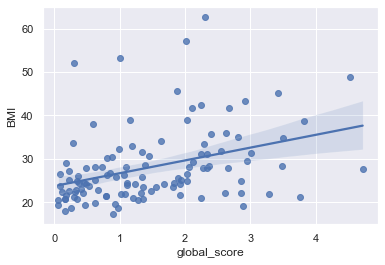

In [35]:
sns.regplot(x='global_score', y='BMI', data=questionnaire_clean_data)

<AxesSubplot:xlabel='restraint', ylabel='BMI'>

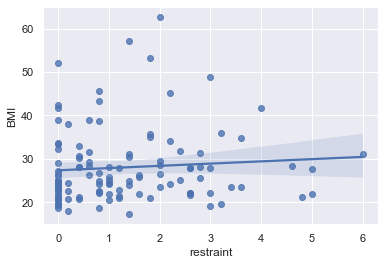

In [36]:
sns.regplot(x='restraint', y='BMI', data=questionnaire_clean_data)

<AxesSubplot:xlabel='eating_concern', ylabel='BMI'>

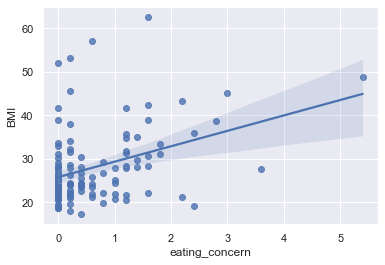

In [37]:
sns.regplot(x='eating_concern', y='BMI', data=questionnaire_clean_data)

<AxesSubplot:xlabel='shape_concern', ylabel='BMI'>

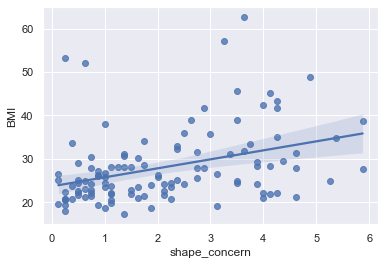

In [38]:
sns.regplot(x='shape_concern', y='BMI', data=questionnaire_clean_data)

<AxesSubplot:xlabel='weight_concern', ylabel='BMI'>

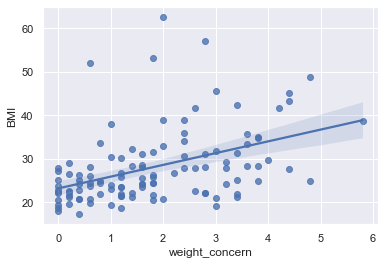

In [39]:
sns.regplot(x='weight_concern', y='BMI', data=questionnaire_clean_data)

<AxesSubplot:xlabel='desire_to_control', ylabel='global_score'>

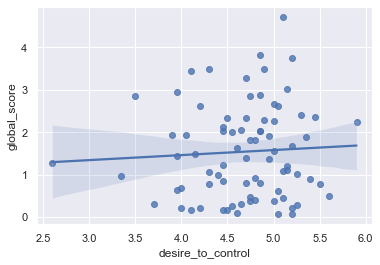

In [44]:
sns.regplot(x='desire_to_control', y='global_score', data=questionnaire_clean_data)

In [47]:
import statsmodels.formula.api as smf
smf.ols("desire_to_control ~ global_score",  data=questionnaire_clean_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      desire_to_control   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2730
Date:                Sat, 12 Feb 2022   Prob (F-statistic):              0.603
Time:                        22:30:38   Log-Likelihood:                -63.943
No. Observations:                  79   AIC:                             131.9
Df Residuals:                      77   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6337      0.108     43.035      0.000       4.419       4.848
global_score     0.0299      0.057      0.523      0.603      -0.084       0.144
==============================================================================
Omnibus:                       14.815   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.567
Skew:                          -0.863   Prob(JB):                     9.29e-05
Kurtosis:                       4.632   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
questionnaire_clean_data.to_csv('./Data/cleaned_questionnaire_data.csv')